<a href="https://colab.research.google.com/github/GLuarte/TareasX/blob/master/Tarea3_DSP(Localizaci%C3%B3n_Generalizada_No_Capacitada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp

In [0]:
from pulp import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

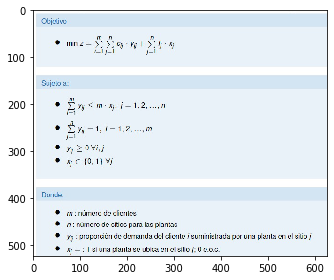

In [3]:
from skimage import io

io.imshow(io.imread("https://github.com/GLuarte/TareasX/blob/master/Modelo%20general%20ubicacion.jpg?raw=true"))
io.show()

In [0]:
# Min Z=sum Cij * Yij + sum Fj*Xj
# s.a
# sum Yij <= m*Xj, j=1,2,...,n
# Yij = 1, i = 1,2,...,m
# Yij >= 0 forall i,j 
# Xi in {0,1} forall j

# m = numero de clientes
# n = numero de sitios para plantas
# Yij = prop de demanda del cliente i suministrada por una planta en el sitio j
# Xj = 1 si una planta se ubica en el sitio j, 0 en otro caso

In [0]:
s=['s0','s1','s2','s3']##N
cos=['c0','c1','c2','c3']##M
m=4
c={'c0':[28,84,112,112],'c1':[60,20,50,50],'c2':[96,60,24,60],
        'c3':[64,40,40,16]}
dc=pd.DataFrame(c,index=['s0','s1','s2','s3'])

f={'f':[50,50,50,50]}
df=pd.DataFrame(f,index=['s0','s1','s2','s3'])

In [6]:
dc

,c0,c1,c2,c3
s0,28,60,96,64
s1,84,20,60,40
s2,112,50,24,40
s3,112,50,60,16


In [7]:
df

,f
s0,50
s1,50
s2,50
s3,50


In [0]:
x=LpVariable.dicts('Planta ubicada en j',
                   [(j) for j in s],
                   lowBound=0,
                   upBound=1,
                   cat='Binary')


In [0]:
y=LpVariable.dicts('demanda_i_a_j',
                   [(i,j) for i in cos for j in s],
                   lowBound=0,
                   cat='Integer')



In [0]:
z=LpProblem('Locgeneralizado(no-capacitado)',LpMinimize)

In [0]:
z+=lpSum(((dc[i][j])*(y[(i,j)])) for i in cos for j in s)+lpSum(df['f'][j]*x[j] for j in s)

In [0]:
for j in s:
  z+=lpSum(y[(i,j)]for i in cos)>=1

In [0]:
for i in cos:
  z+=lpSum((y[(i,j)]-m*x[j]) for j in s)<=0

In [15]:
z.writeLP('tarea3-DSP.lp')
z.solve()
print('status:', LpStatus[z.status])
for v in z.variables():
  print(v.name, v.varValue)
print ('FO:',value(z.objective))

status: Optimal
Planta_ubicada_en_j_s0 0.0
Planta_ubicada_en_j_s1 0.0
Planta_ubicada_en_j_s2 0.0
Planta_ubicada_en_j_s3 1.0
demanda_i_a_j_('c0',_'s0') 1.0
demanda_i_a_j_('c0',_'s1') 0.0
demanda_i_a_j_('c0',_'s2') 0.0
demanda_i_a_j_('c0',_'s3') 0.0
demanda_i_a_j_('c1',_'s0') 0.0
demanda_i_a_j_('c1',_'s1') 1.0
demanda_i_a_j_('c1',_'s2') 0.0
demanda_i_a_j_('c1',_'s3') 0.0
demanda_i_a_j_('c2',_'s0') 0.0
demanda_i_a_j_('c2',_'s1') 0.0
demanda_i_a_j_('c2',_'s2') 1.0
demanda_i_a_j_('c2',_'s3') 0.0
demanda_i_a_j_('c3',_'s0') 0.0
demanda_i_a_j_('c3',_'s1') 0.0
demanda_i_a_j_('c3',_'s2') 0.0
demanda_i_a_j_('c3',_'s3') 1.0
FO: 138.0
